# Drug overdoses by race and drug type

This notebook read the `output/rates-by-race.csv` file, analyzes national overdose rates by race, and then produces a series of bar charts.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from os import path
import matplotlib.font_manager as fm
from matplotlib import rcParams

## Set some matplot properties for aesthetics

In [2]:
# Space between headline and axis
rcParams['axes.titlepad'] = 20 

In [3]:
# Check for fonts if available

# check for avenir
if path.isfile("../fonts/AvenirNext-Regular.ttf"):
    tickfont = fm.FontProperties(
        fname="../fonts/AvenirNext-Regular.ttf", 
        size = 24
    )
    
    labelfont = fm.FontProperties(
        fname="../fonts/AvenirNext-Regular.ttf", 
        size = 22
    )
else:
    tickfont = fm.FontProperties(
        family="Arial", 
        size = 24
    )
    
    labelfont = fm.FontProperties(
        family="Arial", 
        size = 22
    )

# check for proxima nova extra bold
if path.isfile("../fonts/ProximaNova-Xbold-webfont.woff"):
    titlefont = fm.FontProperties(
        fname = "../fonts/ProximaNova-Xbold-webfont.woff",
        size = 36
    )
else:
    titlefont = fm.FontProperties(
        family = "Arial",
        size = 36
    )

## Load the data

In [4]:
race_rates = pd.read_csv("../output/rates-by-race.csv")
race_rates

,Race,drug,adj_rate_15,adj_rate_16,adj_rate_flag_15,adj_rate_flag_16,deaths_15,deaths_16,deaths_flag_15,deaths_flag_16,lower_int_15,lower_int_16,population_15,population_16,upper_int_15,upper_int_16,gt_100_deaths,nonoverlapping_intervals,zscore,sig
0,Hispanic or Latino,all,7.65,9.48,NaN,NaN,4117.0,5230.0,NaN,NaN,7.41,9.22,56592793,57470287,7.89,9.75,True,True,10.554978,1.0
1,American Indian or Alaska Native,all,21.23,24.24,NaN,NaN,553.0,638.0,NaN,NaN,19.42,22.32,2689706,2711067,23.03,26.16,True,False,2.319563,1.0
2,Asian or Pacific Islander,all,2.69,3.10,NaN,NaN,548.0,644.0,NaN,NaN,2.46,2.86,19116557,19479730,2.91,3.35,True,False,2.366164,1.0
3,Black or African American,all,12.18,17.08,NaN,NaN,5070.0,7220.0,NaN,NaN,11.84,16.68,41777483,42141669,12.52,17.48,True,True,18.550021,1.0
4,White,all,21.07,25.30,NaN,NaN,41720.0,49457.0,NaN,NaN,20.86,25.07,201242281,201324760,21.28,25.53,True,True,27.872262,1.0
5,Hispanic or Latino,coc_fen,0.23,0.69,NaN,NaN,124.0,403.0,NaN,NaN,0.19,0.63,56592793,57470287,0.28,0.76,True,True,11.430782,1.0
6,American Indian or Alaska Native,coc_fen,NaN,NaN,Unreliable,Unreliable,5.0,15.0,NaN,NaN,0.07,0.32,2689706,2711067,0.48,0.94,False,False,NaN,0.0
7,Asian or Pacific Islander,coc_fen,NaN,0.10,Unreliable,NaN,8.0,20.0,NaN,NaN,0.02,0.06,19116557,19479730,0.08,0.15,False,False,NaN,0.0
8,Black or African American,coc_fen,0.56,1.88,NaN,NaN,243.0,779.0,NaN,NaN,0.48,1.74,41777483,42141669,0.63,2.01,True,True,17.289559,1.0
9,White,coc_fen,0.62,1.60,NaN,NaN,1151.0,2936.0,NaN,NaN,0.58,1.54,201242281,201324760,0.65,1.66,True,True,29.507775,1.0


## What are the latest rates of overdose by race?

In [5]:
rates_with_change = (
    race_rates[[
        'Race',
        "drug",
        "deaths_15",
        "deaths_16",
        "adj_rate_15",
        "adj_rate_16",
    ]]
    .sort_values(
        "adj_rate_16",
        ascending = False
    )
    .assign(
        pct_change = lambda x: (
            100 * (x["adj_rate_16"] - x["adj_rate_15"]) / 
            x["adj_rate_15"]
        ).round(2)
    )
    .reset_index(drop = True)
)
rates_with_change

,Race,drug,deaths_15,deaths_16,adj_rate_15,adj_rate_16,pct_change
0,White,all,41720.0,49457.0,21.07,25.30,20.08
1,American Indian or Alaska Native,all,553.0,638.0,21.23,24.24,14.18
2,Black or African American,all,5070.0,7220.0,12.18,17.08,40.23
3,Hispanic or Latino,all,4117.0,5230.0,7.65,9.48,23.92
4,Asian or Pacific Islander,all,548.0,644.0,2.69,3.10,15.24
5,Black or African American,coc_fen,243.0,779.0,0.56,1.88,235.71
6,White,coc_fen,1151.0,2936.0,0.62,1.60,158.06
7,Hispanic or Latino,coc_fen,124.0,403.0,0.23,0.69,200.00
8,Asian or Pacific Islander,coc_fen,8.0,20.0,NaN,0.10,NaN
9,American Indian or Alaska Native,coc_fen,5.0,15.0,NaN,NaN,NaN


In [6]:
def create_barchart(df, cols, title):
    plt.style.use("ggplot")
    fig, ax = plt.subplots( figsize = (16, 9))

    width = 0.35

    colors = [ "#fdae6b", "#e6550d" ]
    
    df = (
        df
        .fillna(0)
        .sort_values(cols[-1], ascending = True)
        .set_index("Race")
        .copy()
    )
    
    positions = np.arange(len(df))
    
    for i, c in enumerate(cols):
        ax.barh(
            positions - width * i, 
            df[c],
            width,
            color = colors[i]
        )

    ax.tick_params(labelsize = 30)
    
    # Set the position of the x ticks
    ax.set_yticks([ p - (width / 2) for p in positions ])
    ax.set_yticklabels(df.index.tolist())
    ax.set_title(title, fontproperties = titlefont)
    
    # set font of tick labels
    for label in ax.get_xticklabels():
        label.set_fontproperties(tickfont)

    for label in ax.get_yticklabels():
        label.set_fontproperties(tickfont)
    
    ax.legend(
        ['2015', '2016'],
        loc = "lower right",
        prop = labelfont
    )
    
    return fig, ax

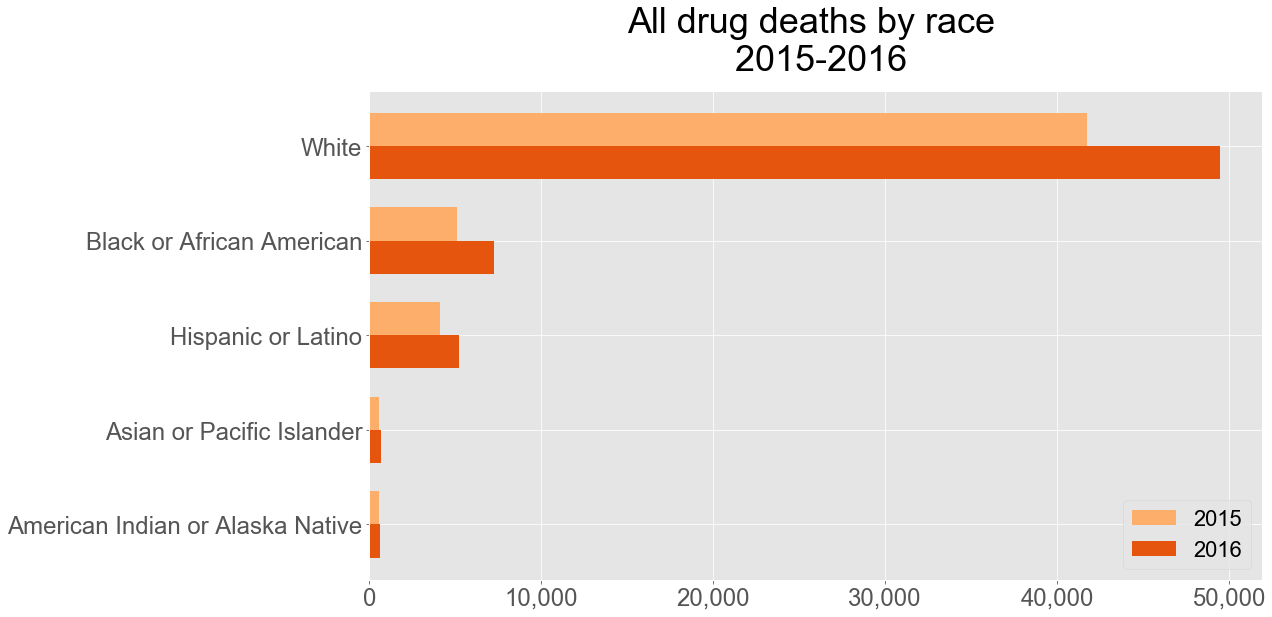

In [7]:
fig, ax = create_barchart(
    rates_with_change.loc[lambda x: x["drug"] == "all"],
    [ "deaths_15", "deaths_16" ],
    "All drug deaths by race \n 2015-2016"
);


ax.set_xticklabels(
        [ "{:,.0f}".format(x) for x in ax.get_xticks() ]
);

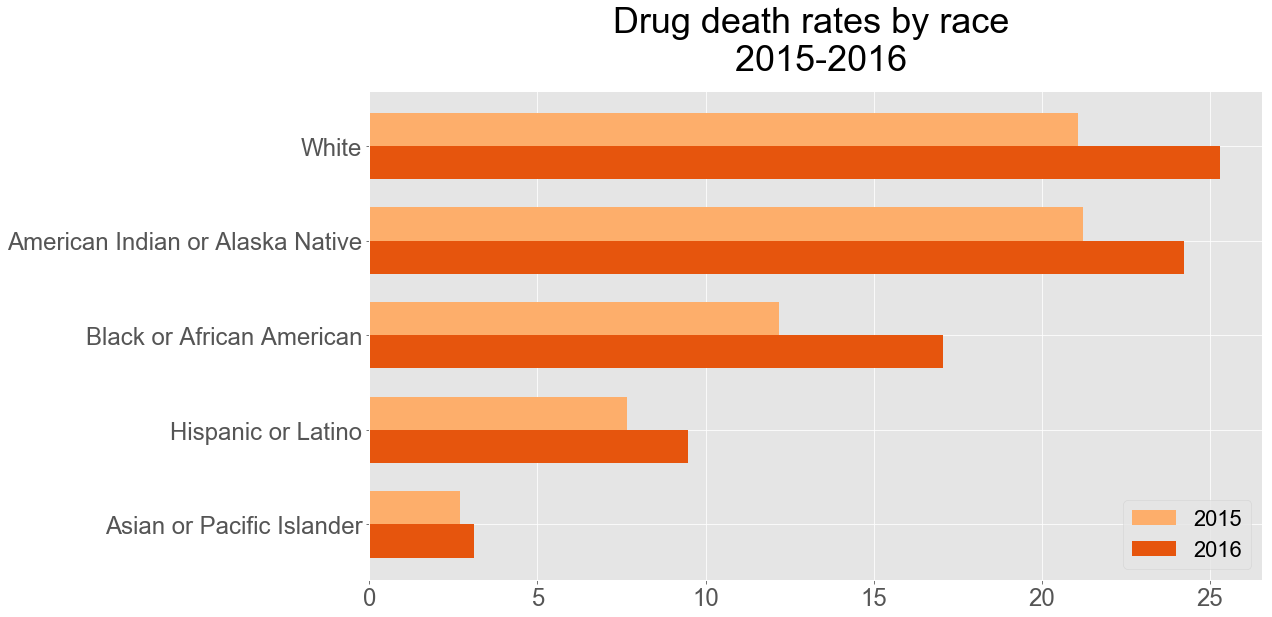

In [8]:
create_barchart(
    rates_with_change.loc[lambda x: x["drug"] == "all"],
    [ "adj_rate_15", "adj_rate_16" ],
    "Drug death rates by race \n 2015-2016"
);

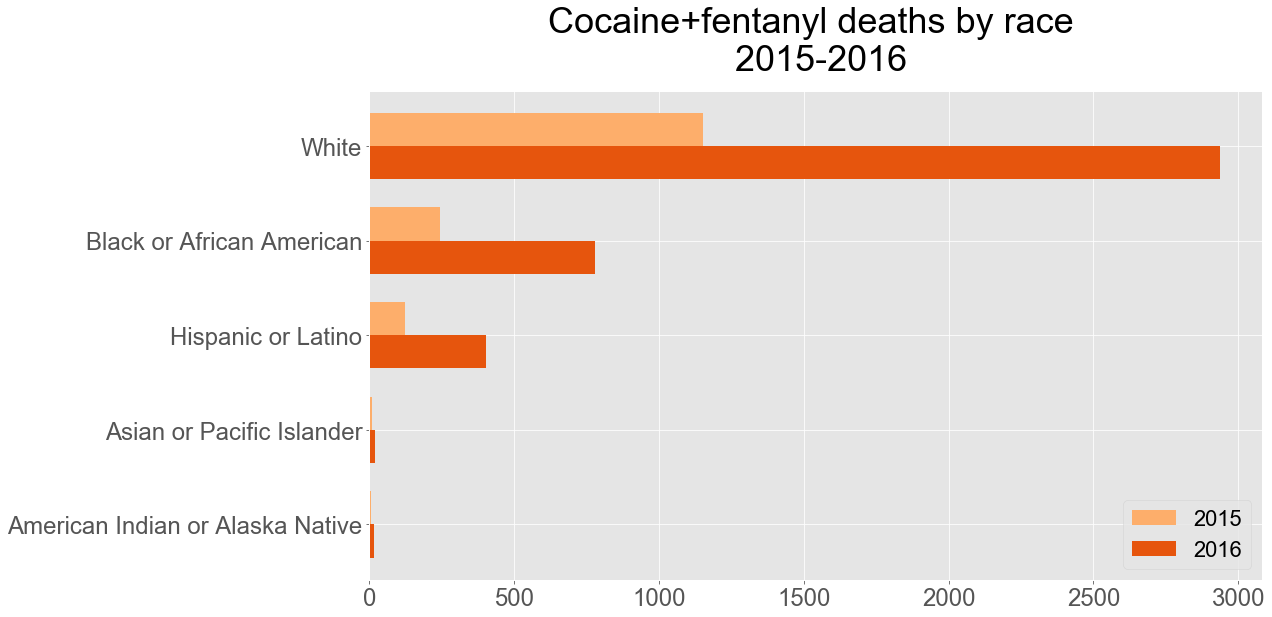

In [9]:
create_barchart(
    rates_with_change.loc[lambda x: x["drug"] == "coc_fen"],
    [ "deaths_15", "deaths_16" ],
    "Cocaine+fentanyl deaths by race \n 2015-2016"
);

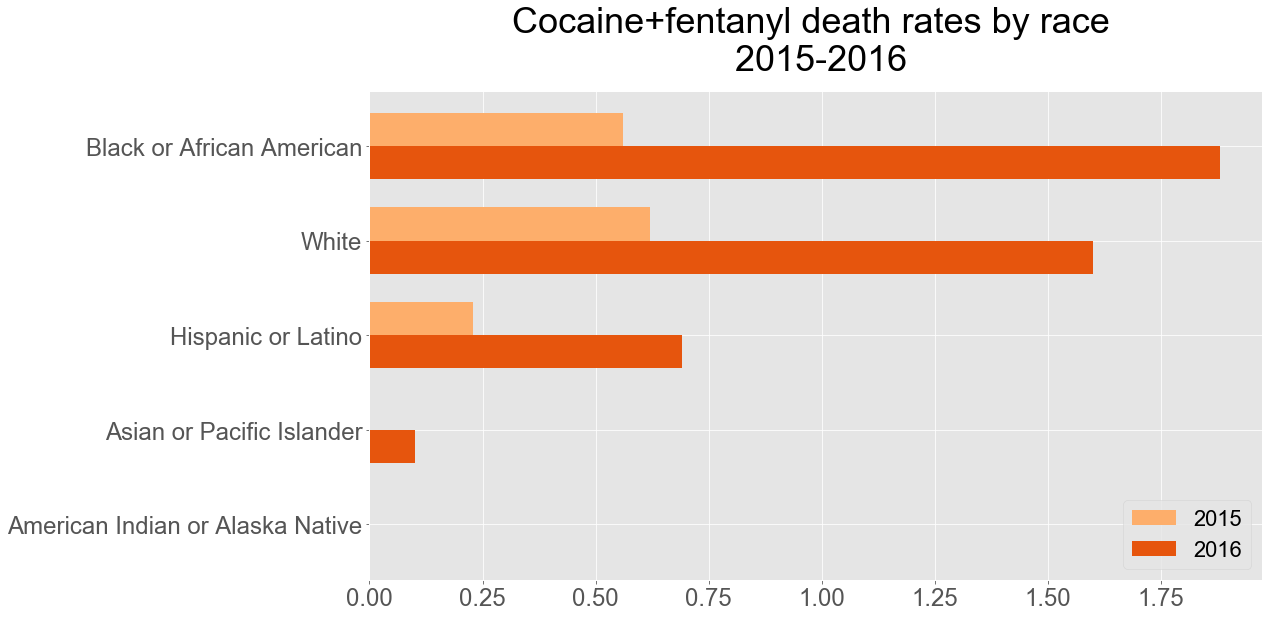

In [10]:
create_barchart(
    rates_with_change.loc[lambda x: x["drug"] == "coc_fen"],
    [ "adj_rate_15", "adj_rate_16" ],
    "Cocaine+fentanyl death rates by race \n 2015-2016"
);

---

---

---